<a href="https://colab.research.google.com/github/Zyqzyqzyqzyq/skeleton-sp21/blob/master/world_tour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project-description
The World Tour project is a combination of optimal transport and
resources allocation problems. The goal of the project is to organize
the best route to minimize the cost in terms of flight and staging, and
to maximize the total revenue. This problem can be visualized to a graph
filled with nodes which represents each city and lines between source
city and target city could be the route.

# Question list

#### Which 15 cities does Lady Gaga have the highest level of popularity on each continent?
Criteria of city selection in each continent:  
* Country selecting: Google Trends (Keyword: “Chromatical Ball” in past 12 months);
* Cities are chosen based on the past data of the world tour for Lady gaga;
* Each countries should have at most 3 cities (exclude countries in North America);


####The reference concert for choosing the cities and venues:
* The Fame Ball Tour (2009)
* The Monster Ball Tour (2009–2011)
* The Born This Way Ball (2012–2013)
* ArtRave: The Artpop Ball (2014)
* Joanne World Tour (2017–2018)
* The Chromatica Ball (2022)


#### What is the objective function? How does the objective function relate to an optimal transport problem?
* Ticket Revunue - Cost of tour - Staging cost



#### What are the constraints?
* maximum capacity of each venue
* permitted flight tour between cities(domestic and international) 

#### Which two continents should be connected?
* North America -> South America -> Africa -> Oceania -> Asia -> Europe -> North America
* North America -> South America -> Africa -> Europe -> Asia -> Oceania -> North America


#### How do we visualize the cities that we have chosen to make a clear pattern of the problem? What tools? 
* By using Google my map to plot and connect the cities. 
* By using Distance.to calculating the distance of each cities.
#### What are the factors that we consider the starting city and target city for each continent?
* Distance and Permitted flight


#### Additional factors may need to be considered
* Should the flight between two cities really exist or we evaluate the theoretical optimal route only?
* Ticket Pricing: Based on past data and predicting the rate of increase.




# Examples of data collected and computations performed
* All cities venue capacity distance between cities. (show a table as an example here) 
* Price and quantity sold of tickets in each city/Revenue from advertising and sponsorships
* Total cost of staging a concert in each city/Travel costs between cities (flight, hotel..)
* Net profit/Price of ticket


## South America Cities Tour 

Cities:

0. Sao Paulo

1. Porto Alegre

2. Curitiba

3. Rio de Janeiro

4. Buenos Aires

5. Rosario

6. Santiago

7. Lima

8. San Juan

9. San José

10. Bogotá

11. Asunción

In [ ]:
!pip install ortools


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.0 MB 9.2 MB/s 
     |████████████████████████████████| 408 kB 60.4 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.9 which is incompatible.
tensorflow-metadata 1.10.0 requires protobuf<4,>=3.13, but you have protobuf 4.21.9 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.9 which is incompatible.
google-cloud-bigquery-storage 1.1.2 requires protobuf<4.0.0dev, but you have protobuf 4.21.9 which is incompatible.
google-api-core 1.31.

In [ ]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    data = {}
    data['distance_matrix'] = [
        [0, 852, 339,	362,	1676,	1728,	2587,	3458,	5134,	5523,	4333,	1124],
        [852,	0,	546	,1127,	844,	957,	1878,	3334,	5631,	5673,	4572,	822],
        [339,	546	,0,	680	,1345	,1389,	2252,	3275,	5217,	5453,	4295,	836],
        [362,	1127,	680,	0	,1970	,2050,	2930,	3783,	5238,	5765,	4554,	1486],
        [1676,	844,	1345,	1970,	0	,282,	1140,	3141,	5964,	5650,	4676,	1043],
        [1728,	957,	1385,	2050,	282	,0,	930	,2863,	5754,	5381,	4425,	909],
        [2587	,1878,	2252,	2930,	1140,	930	,0,	2469,	5799,	5034,	4263,	1561],
        [3458,	3334,	3275,	3783,	3141,	2863,	2469,	0	,3602,	2567,	1894,	2520],
        [5134,	5631,	5217,	5238,	5964,	5754,	5799,	3602,	0	,2158	,1759	,4955],
        [5523,	5673,	5453,	5765,	5650,	5381,	5034,	2567,	2158,	0	,1249	,4859],
        [4333,	4572,	4295,	4554,	4676,	4425,	4263,	1894	,1759	,1249,	0	,3784],
        [1124,	822,	836,	1486,	1043,	909	,1561,	2520,	4955,	4859,	3784,	0],
    ]  # distance in Km
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data


def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {} kilometers'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}kilometers\n'.format(route_distance)


def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(manager, routing, solution)


main()



Objective: 17332 kilometers
Route for vehicle 0:
 0 -> 2 -> 1 -> 11 -> 4 -> 5 -> 6 -> 7 -> 10 -> 9 -> 8 -> 3 -> 0



It turns out

Sao Paulo -> Curitiba -> Porto Alegre -> Asunción -> Buenos Aires -> Rosario -> Santiago -> Lima -> Bogotá -> San José -> San Juan -> Rio de Janeiro

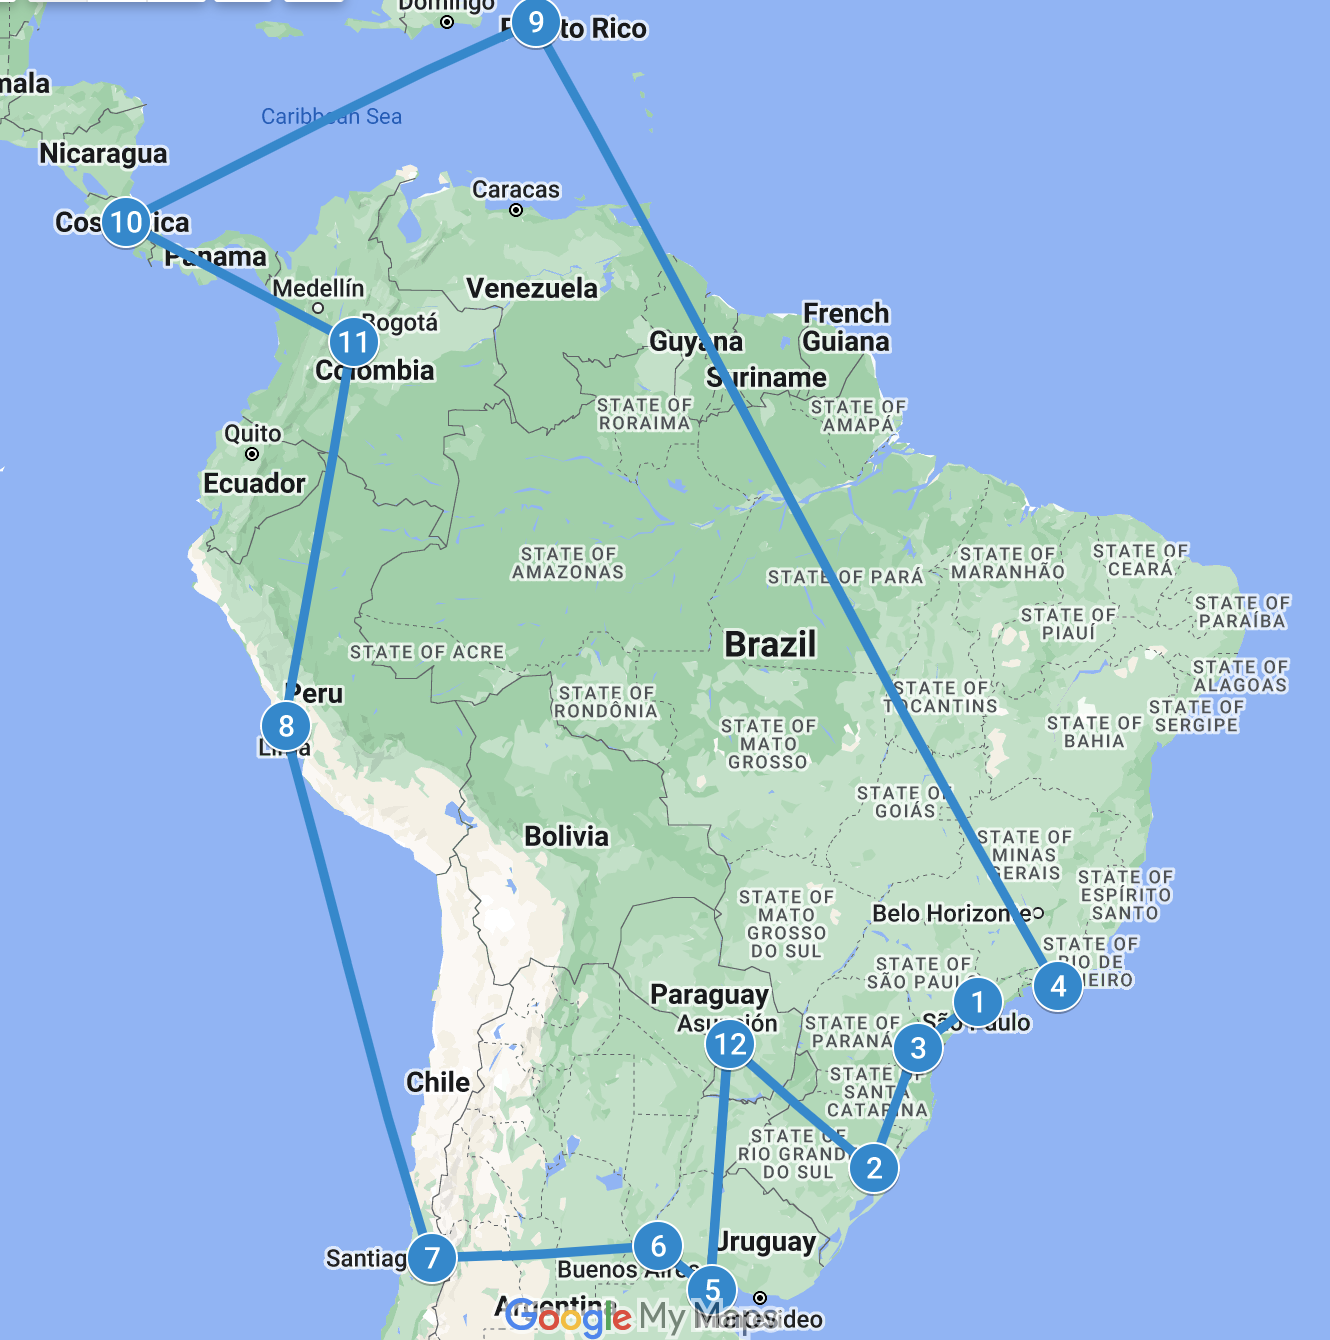